In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
pd.options.mode.chained_assignment = None
import json
import sys
import random
sys.path.append('../tdiff_path/')

# import some modules that I created to do some data processing.

import dataset_operations.dataset_operations as do
import retrieve_data.retrieve_data as retrieve

In [11]:
# I have metadata for all the datasets I have available stored in a csv.
site_file_metadata=pd.read_csv('site_file_metadata.csv')

In [12]:
# Let's check out the data we have available!
available_data = site_file_metadata.loc[:,['site','date','data_type']].sort_values(by=['site'])

print(available_data)

   site      date         data_type
27  CLY  20180817           pm-path
15  CLY  20160701           pm-path
26  CLY  20180817           pm-path
23  CLY  20180817     feedline-VSWR
10  CLY  20160701  transmitter-path
25  CLY  20180817  transmitter-path
24  CLY  20180817     feedline-VSWR
4   CLY  20160701     feedline-VSWR
3   CLY  20160628     feedline-VSWR
5   INV  20170811     feedline-VSWR
11  INV  20170813  transmitter-path
16  INV  20170813           pm-path
1   PGR  20171003     feedline-VSWR
9   PGR  20170930  transmitter-path
2   PGR  20170930     feedline-VSWR
14  PGR  20171001           pm-path
22  RKN  20180808           pm-path
21  RKN  20180808           pm-path
20  RKN  20180808  transmitter-path
7   RKN  20160721     feedline-VSWR
18  RKN  20180808     feedline-VSWR
17  RKN  20160719           pm-path
6   RKN  20160705     feedline-VSWR
19  RKN  20180808     feedline-VSWR
12  RKN  20160719  transmitter-path
0   SAS  20170627     feedline-VSWR
8   SAS  20170630  transmitt

In [28]:
# Now we can choose a site, date, and data type that we want to look at. 

%run load_data.py CLY 20180817 pm-path

There is missing data from the following channel: []



In [29]:
# load_data.py has made the following available to us:
# working_dataframe, with all information on all channels from this site, date, and data type
# linear_fit_dict, with information on the phase path for each channel
# cable_loss_dataset_dict, if we chose feedline-VSWR datatype, which is used to calculate a single-direction 
#   path from a VSWR measurement.

# Here is a few lines from the working dataframe
print(working_dataframe.head())

      freq  M0magnitude  M0phase_deg  M1magnitude  M1phase_deg  M2magnitude  \
0  8000000    14.390086   144.944183    14.431127   143.980942    14.600711   
1  8030000    14.378378   139.116516    14.409729   138.240814    14.586692   
2  8060000    14.332479   133.010605    14.365749   132.192123    14.565275   
3  8090000    14.324810   126.923569    14.331370   126.037354    14.550996   
4  8120000    14.292202   121.152634    14.312615   120.305115    14.536831   

   M2phase_deg  M3magnitude  M3phase_deg  M4magnitude       ...         \
0   139.236679    14.513210   144.256424   -34.177628       ...          
1   133.397079    14.509064   138.349976   -41.843716       ...          
2   127.306061    14.476974   132.230484   -34.120739       ...          
3   121.336678    14.467180   126.256256   -48.119297       ...          
4   115.503510    14.437731   120.461250   -32.504646       ...          

   I2phase_rad  I3phase_rad  M_all_phase_deg_unwrap  M_all_phase_rad  \
0     1.

In [30]:
# We can also take a look at what's in the linear_fit_dict:
print(linear_fit_dict.keys())
print(linear_fit_dict['M0'].keys())

dict_keys(['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'I0', 'I1', 'I2', 'I3', 'M_all_', 'I_all_'])
dict_keys(['slope', 'intercept', 'rvalue', 'pvalue', 'stderr', 'offset_of_best_fit_rads', 'time_delay_ns', 'best_fit_line_rads'])


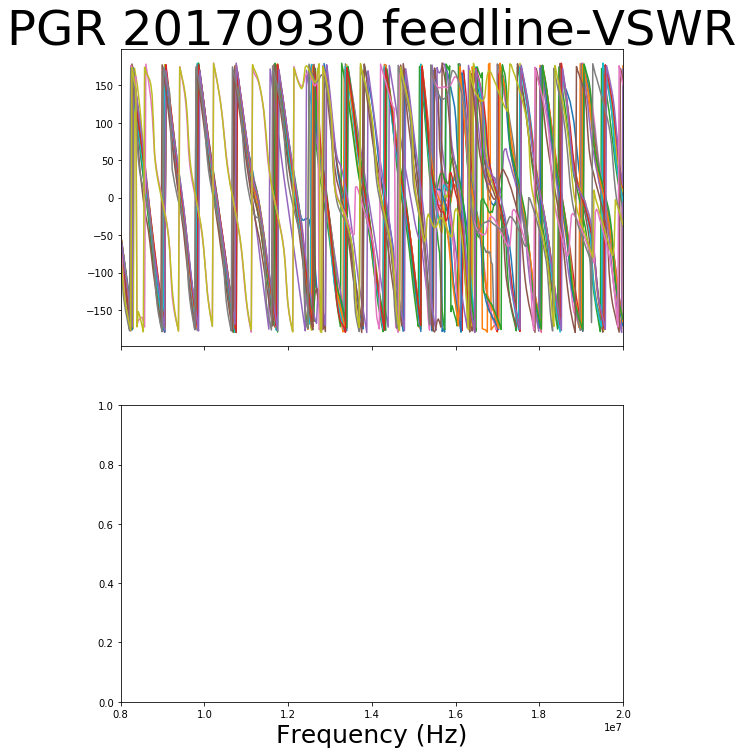

In [6]:
plot_title = working_site + ' ' + str(working_date) + ' ' + working_data_type

fig, smpplot = plt.subplots(2, 1, sharex='all', figsize=(9,12))
xmin, xmax, ymin, ymax = smpplot[0].axis(xmin=8e6, xmax=20e6)
smpplot[1].set_xlabel('Frequency (Hz)', size=25.0)
smpplot[0].set_title(plot_title, size=48.0)

for channel in channels:
    smpplot[0].plot(working_dataframe['freq'], working_dataframe[channel + 'phase_deg'], label=channel)
    
plt.show()